# ライブラリ

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# ハイパーパラメータ

In [ ]:
batch_size = 64
lr = 0.01
num_epochs = 10

# データセット

In [ ]:
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 337kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.16MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.90MB/s]


# ネットワーク定義

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

# 損失関数＆最適化アルゴリズム設定

In [ ]:
model = SimpleNN()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

# 学習前の予測

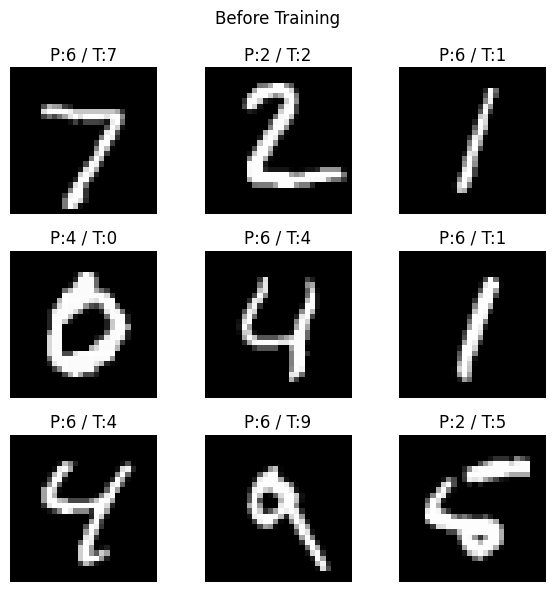

In [ ]:
def show_preds(model, loader, title=""):
    model.eval()
    images, labels = next(iter(loader))
    model_device = next(model.parameters()).device
    images = images.to(model_device)
    labels = labels.to(model_device)
    with torch.no_grad():
        preds = model(images).argmax(dim=1)

    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i][0].cpu(), cmap='gray')
        plt.title(f"P:{preds[i].item()} / T:{labels[i].item()}")
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    print()
    print()
    print()

show_preds(model, test_loader, "Before Training")

# 学習ループ（トレーニング）

In [ ]:
train_losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * images.size(0)

    avg_loss = total_loss / len(train_dataset)
    train_losses.append(avg_loss)

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

Epoch 1, Loss: 1.2140
Epoch 2, Loss: 0.4881
Epoch 3, Loss: 0.3911
Epoch 4, Loss: 0.3518
Epoch 5, Loss: 0.3283
Epoch 6, Loss: 0.3109
Epoch 7, Loss: 0.2969
Epoch 8, Loss: 0.2844
Epoch 9, Loss: 0.2733
Epoch 10, Loss: 0.2629


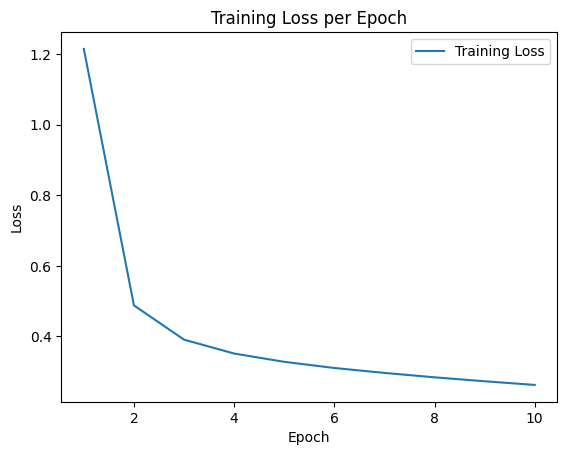

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.show()

# 精度の確認

In [ ]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 92.96%


# 可視化

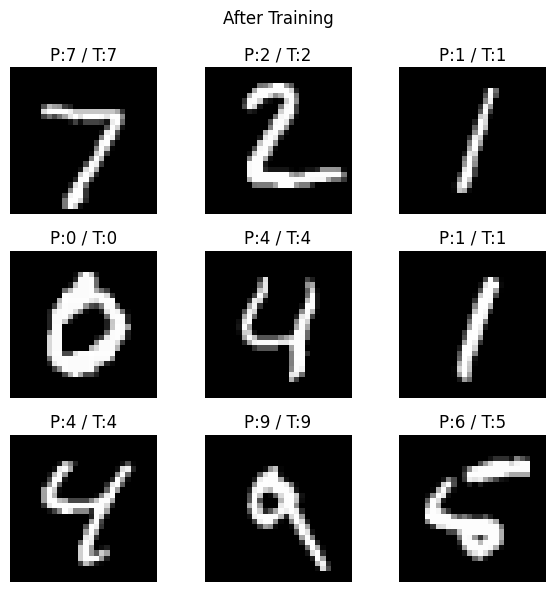

In [ ]:
show_preds(model, test_loader, "After Training")